<a href="https://colab.research.google.com/github/ninadcpa/DSC540/blob/main/Week5_6_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC540 Week 5 and 6  Exercise

@author Ninad Patkhedkar

# **1.  Data Wrangling with Python: Activity 7, page 207**


In [1]:
# This code is written for mounting code folder checked out from github on google drive
# All assignment code will be maintained inside folder "DSC540"
# Code from book is inside folder "Data-Wrangling-with-Python"

from google.colab import drive
import sys
import os

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DSC540')
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSC540')


Mounted at /content/drive


Task 1 create a soup with bs4 and load the data to work later on it


In [78]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

resp = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
s = resp.text
# printing first 500 characters of html page
print(s[:500])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of countries by GDP (nominal) - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e0965951-c4a4-49d3-8f


In [3]:
soup = BeautifulSoup(s)

**Check Number of tables in document**

For checking number of tables, will find html element <table> and then count how many such elements in document.

In [4]:
all_tables = soup.find_all("table")
print(f"Total number of tables are {len(all_tables)}")

Total number of tables are 10


**Find the right table using the class attribute**

Though there 10 tables in document. Not all of them are related to data items. Developer Tools view (inspect) of chrome shows each html element source code. Carefully glancing the code shows that tables containing data is using styleshhet "wikitable". We will filter only those tables.

In [5]:
data_table = soup.find("table", {"class": "wikitable"})
print(type(data_table))

<class 'bs4.element.Tag'>


**Let's separate the source and the actual data**

Traverse table's <tbody> item and find first table row. Then get <td> table data items to find source list

In [79]:
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]

**Task 5 Checking how to get the source names**

In [32]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


So there rae 3 tables from 3 sources i.e.


*   International Monetary Fund
*   World Bank
*   United Nations


In [33]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

print(f"{len(data_tables)}")

3


**Extract  the header names and data for the first source i.e. International Monetary Fund**

In [10]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('tbody')[0].findAll('th')]
header1

['Rank', 'Country/Territory', 'GDP(US$million)']

In [11]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country/Territory,GDP(US$million)
0,,World[21],"93,889,577"
1,1,United States,"22,675,271"
2,2,China[n 2],"16,642,318"
3,3,Japan,"5,378,136"
4,4,Germany,"4,319,286"


**Extract the header names and data for second source i.e. World Bank**

In [34]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('tbody')[0].findAll('th')]
header2

['Rank', 'Country/Territory', 'GDP(US$million)']

In [13]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("\u2660")
        return td.text[index+1:].strip()

In [14]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country/Territory,GDP(US$million)
0,,World,"87,813,420"
1,1,United States,"21,433,226"
2,2,China[n 9],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,861,124"


**Extract the header names and data for third source i.e. United Nations**

In [15]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('tbody')[0].findAll('th')]
header3

['Rank', 'Country/Territory', 'GDP(US$million)']

In [16]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country/Territory,GDP(US$million)
0,,World,"87,813,420"
1,1,United States,"21,433,226"
2,2,China[n 9],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,861,124"


# ***2. Data Wrangling with Python: Activity 8, page 233***



In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data from csv file to panda dataframe
df = pd.read_csv("visit_data.csv")

# display first 5 rows
df.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


**Check for duplicates in essential columns i.e. first_name, second_name and email**

In [18]:
print(f"First name is duplictaed - {any(df.first_name.duplicated())}")
print(f"Last name is duplictaed - {any(df.first_name.duplicated())} ")
print(f"Email is duplictaed - {any(df.email.duplicated())}")

First name is duplictaed - True
Last name is duplictaed - True 
Email is duplictaed - False


**Check if any essential columns i.e. first_name, last_name and email contains NaN**

Check for first_name

In [35]:
any(df['first_name'].isna())

True

check for last_name

In [36]:
any(df['last_name'].isna())

True

check for email

In [37]:
any(df['email'].isna())

False

There are missing or NaN values in first name and last name but email column data looks fine.

**Check for outliers and remove outliers if any**

Number of visits is the only numeric column where we can find outliers. Finding outliers is tricky business. It needs subject expertise it reality.

In this case I will use standard z-score method with threshold +3 and -3

In [40]:
orig_size = df.shape
orig_size

(1000, 7)

In [51]:
from scipy import stats
import numpy as np

# Dropping rows where no information about visits available
df.dropna(subset=['visit'], inplace=True)
df.shape

(974, 7)

In [62]:
any(df['visit'].isna())

False

In [53]:
df['visit_zscore'] = np.abs(stats.zscore(df['visit']))
df.head(5)

,id,first_name,last_name,email,gender,ip_address,visit,visit_zscore
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0,0.325542
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0,0.690467
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0,1.463249
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0,0.591484
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0,1.116269


In [58]:
any(df['visit_zscore'] > 3)

False

In [59]:
any(df['visit_zscore'] < -3)

False

There is no record with z-score greater than 3 and les -3. It means the method I used for outlier detection is wrong.

I need to find some differnt method. I will try with IQR method.
In IQR method, will find inter-qurtile-range and dectct records below Q1 with 1.5*IQR distance and records above Q3 by more than 1.5*IQR distance.

In [67]:
Q1 = df['visit'].quantile(0.25)
Q3 = df['visit'].quantile(0.75)
IQR = Q3 - Q1
print(f" Q1 - {Q1} , Q3 - {Q3} , IQR - {IQR} ")

 Q1 - 794.5 , Q3 - 2224.25 , IQR - 1429.75 


In [64]:
any(df['visit'] < (Q1 - 1.5 * IQR)) 

False

In [65]:
any(df['visit'] > (Q3 + 1.5 * IQR))

False

Even with IQR method unable to find outlier.

In [68]:
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

In [73]:
print(f"The size of previous data was - {size_prev} rows and the size of the new one is - {size_after} rows")
      

The size of previous data was - (974, 8) rows and the size of the new one is - (974, 8) rows


{'boxes': [<matplotlib.lines.Line2D at 0x7f32fe584a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32fe56cc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32fe527250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32feaa8450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32fe5842d0>,
  <matplotlib.lines.Line2D at 0x7f32fea15e50>]}

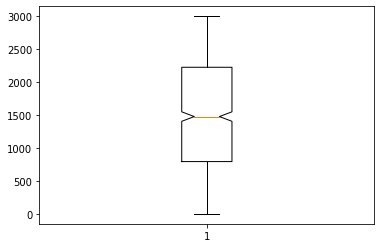

In [74]:
plt.boxplot(df.visit, notch=True)

s we can see that we have data in this column in the interval (0, 3000). However, the main concentration of the data is between ~700 to ~2300. Let us say that anything beyond 2900 and bellow 100 are outliers for us. We need to get rid of them

In [75]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]

In [76]:
print(f"After getting rid of outliers the new size of the data is - {df1.shape}")

After getting rid of outliers the new size of the data is - (923, 8)


Notice extra column I added for z-score caused change in shape i.e. columns as 8 instead of 7

# **3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):**

a. Name, Address, City, State, Zip, Phone Number



In [20]:
sqlite_db_path = '/content/drive/MyDrive/sqlite_databases'

In [21]:
import sqlite3
conn = sqlite3.connect(sqlite_db_path + 'peoples.db')

In [22]:
sql_create_peoples_table = """ CREATE TABLE IF NOT EXISTS peoples (
                                        name VARCHAR(30) NOT NULL,
                                        address VARCHAR(30),
                                        city VARCHAR(20),
                                        zip VARCHAR(5),
                                        phone_number VARCHAR(10) 
                                    ); """

if conn is not None:
    try:
        conn.execute(sql_create_peoples_table)
    except Error as e:
        print(e)
else:
    print(f"Invalid database connection")

In [23]:
conn.commit()

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [24]:
# Creating dataset
data = [
        ('John Doe','100 Becker Street','Chicago','60015','4536273492'),
        ('Shane Warn','101 Becker Street','Chicago','60015','4536274322'),
        ('Sachin Tendulkar','102 Becker Street','Chicago','60015','4536268921'),
        ('Steve Jobs','103 Becker Street','Chicago','60015','4536268655'),
        ('Tom Hanks','104 Becker Street','Chicago','60018','7773268655'),
        ('Kate Whinslet','105 Becker Street','New York','45328','8833268655'),
        ('Serena Williams','106 Becker Street','New York','45328','8833268321'),
        ('Magnus Larsen','107 Becker Street','Tampa','85428','9933268345'),
        ('Andre Agassi','108 Becker Street','Dallas','75428','6833268347'),
        ('Sharva P','109 Becker Street','Dallas','75428','6833268347'),
]

In [25]:
stmt = "insert into peoples values (?,?,?,?,?)"
conn.executemany(stmt,data)
conn.commit()

In [26]:
cursor = conn.execute("select * from peoples")
rows = cursor.fetchall()
rows

[('John Doe', '100 Becker Street', 'Chicago', '60015', '4536273492'),
 ('Shane Warn', '101 Becker Street', 'Chicago', '60015', '4536274322'),
 ('Sachin Tendulkar', '102 Becker Street', 'Chicago', '60015', '4536268921'),
 ('Steve Jobs', '103 Becker Street', 'Chicago', '60015', '4536268655'),
 ('Tom Hanks', '104 Becker Street', 'Chicago', '60018', '7773268655'),
 ('Kate Whinslet', '105 Becker Street', 'New York', '45328', '8833268655'),
 ('Serena Williams', '106 Becker Street', 'New York', '45328', '8833268321'),
 ('Magnus Larsen', '107 Becker Street', 'Tampa', '85428', '9933268345'),
 ('Andre Agassi', '108 Becker Street', 'Dallas', '75428', '6833268347'),
 ('Sharva P', '109 Becker Street', 'Dallas', '75428', '6833268347'),
 ('John Doe', '100 Becker Street', 'Chicago', '60015', '4536273492'),
 ('Shane Warn', '101 Becker Street', 'Chicago', '60015', '4536274322'),
 ('Sachin Tendulkar', '102 Becker Street', 'Chicago', '60015', '4536268921'),
 ('Steve Jobs', '103 Becker Street', 'Chicago', 

In [27]:
cursor.description

(('name', None, None, None, None, None, None),
 ('address', None, None, None, None, None, None),
 ('city', None, None, None, None, None, None),
 ('zip', None, None, None, None, None, None),
 ('phone_number', None, None, None, None, None, None))

In [28]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,name,address,city,zip,phone_number
0,John Doe,100 Becker Street,Chicago,60015,4536273492
1,Shane Warn,101 Becker Street,Chicago,60015,4536274322
2,Sachin Tendulkar,102 Becker Street,Chicago,60015,4536268921
3,Steve Jobs,103 Becker Street,Chicago,60015,4536268655
4,Tom Hanks,104 Becker Street,Chicago,60018,7773268655
5,Kate Whinslet,105 Becker Street,New York,45328,8833268655
6,Serena Williams,106 Becker Street,New York,45328,8833268321
7,Magnus Larsen,107 Becker Street,Tampa,85428,9933268345
8,Andre Agassi,108 Becker Street,Dallas,75428,6833268347
9,Sharva P,109 Becker Street,Dallas,75428,6833268347
